# Table of Contents
 <p><div class="lev1"><a href="#Polarization-Curves"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarization Curves</a></div><div class="lev1"><a href="#A-simple-1D-Fuel-Cell-Model"><span class="toc-item-num">2&nbsp;&nbsp;</span>A simple 1D Fuel Cell Model</a></div><div class="lev2"><a href="#Initialize-the-Kulikovsky-Model"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialize the Kulikovsky Model</a></div><div class="lev3"><a href="#Operating-Conditions"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Operating Conditions</a></div><div class="lev3"><a href="#Kulikovsky-Parameter-Set"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Kulikovsky Parameter Set</a></div><div class="lev2"><a href="#Fitting-Procedure"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fitting Procedure</a></div><div class="lev1"><a href="#References"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></div>

In [1]:
# My Default Packages

import scipy as sp
import pandas as pd
from cycler import cycler, cycle
from IPython.display import IFrame

import pint
u = pint.UnitRegistry()

# Setup Matplotlib
%matplotlib notebook
import pylab as plt

def pylab_setup():
    params = {
                #'backend': 'ps',
                'axes.labelsize': 24,
                'axes.titlesize': 28,
#                'text.fontsize': 20,                
                'legend.fontsize': 20,
                'xtick.labelsize': 20,
                'ytick.labelsize': 20,
            }
    for key in params.keys():
        plt.rcParams[key] = params[key]
        
pylab_setup()

In [2]:
# Setup page format

from IPython.core.display import HTML
def css_styling():
    styles = open("widescreen.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})


figsize = (16,10)

In [4]:
# Setup cycler
# Documentation on the cylcers can be found at http://matplotlib.org/cycler/
color_cycle = cycler(c=['r', 'g', 'b','m','y'])
ls_cycle = cycler('ls', ['-', '--'])
lw_cycle = cycler('lw', range(1, 4))
sty_cycle = color_cycle


# Polarization Curves



In [22]:
dfs = {}

dfs['1.00 x BL'] = pd.read_csv('../OpenFCST/ChannelStudy/Baseline/polarization_curve.dat',comment='#',sep='\t')
dfs['0.50 x BL'] = pd.read_csv('../OpenFCST/ChannelStudy/BaselineX0p5/polarization_curve.dat',comment='#',sep='\t')
dfs['0.75 x BL'] = pd.read_csv('../OpenFCST/ChannelStudy/BaselineX0p75/polarization_curve.dat',comment='#',sep='\t')
dfs['1.25 x BL'] = pd.read_csv('../OpenFCST/ChannelStudy/BaselineX1p25/polarization_curve.dat',comment='#',sep='\t')
dfs['2.00 x BL'] = pd.read_csv('../OpenFCST/ChannelStudy/BaselineX2/polarization_curve.dat',comment='#',sep='\t')



In [24]:
dfs['1.00 x BL'].columns

Index(['Cell voltage [V]', 'Cathode current [A/cm2]', 'max_temperature',
       'anode_current', 'water_cathode', 'water_anode',
       'cathode_reaction_heat', 'anode_reaction_heat', 'cathode_irrev_heat',
       'cathode_rev_heat', 'cathode_watervap_heat', 'electron_ohmic_heat',
       'proton_ohmic_heat'],
      dtype='object')

<IPython.core.display.Javascript object>


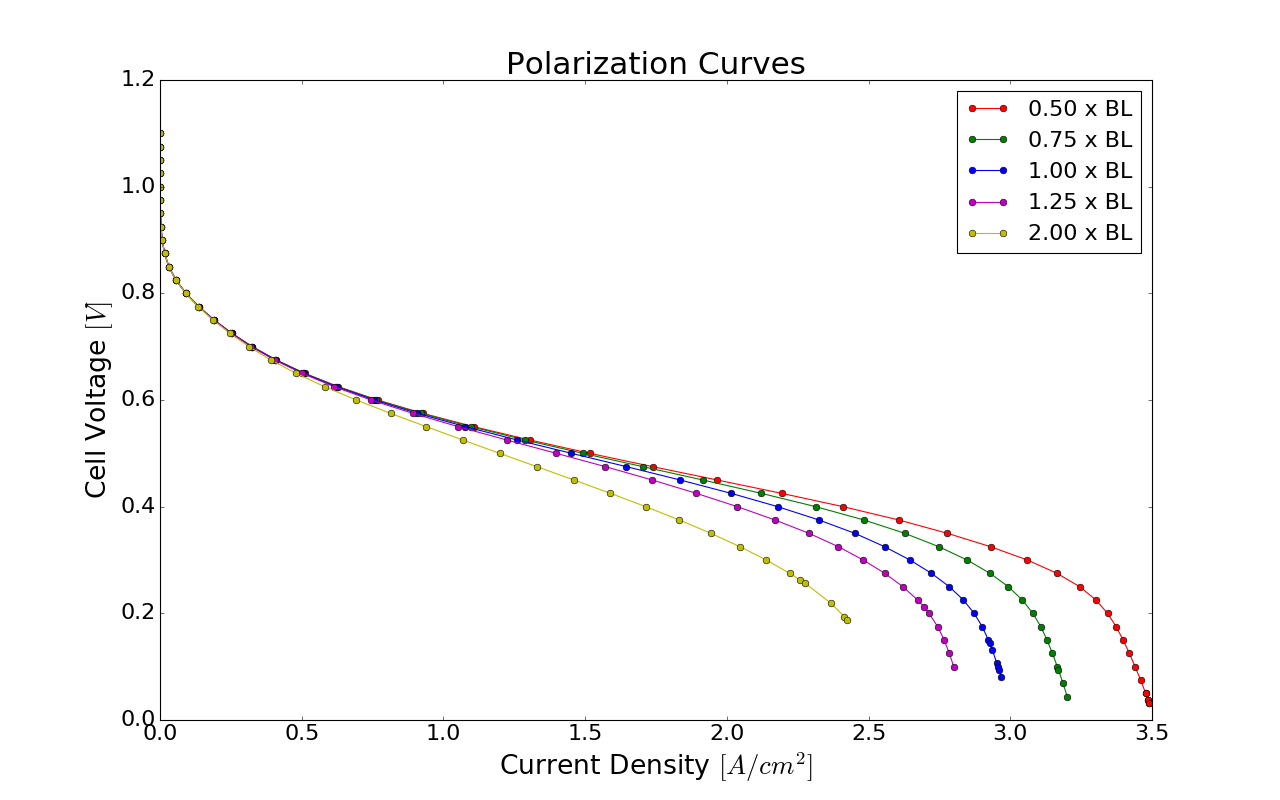

In [25]:
plt.figure(figsize=figsize)
style_cycler = cycle(color_cycle)
for key in sorted(dfs.keys()):
    df = dfs[key]
    sty = next(style_cycler)
    plt.plot(df['Cathode current [A/cm2]'],df['Cell voltage [V]'],'o-',label=key,**sty)
    plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Cell Voltage $[V]$')
    
plt.title('Polarization Curves')
plt.legend()

<IPython.core.display.Javascript object>


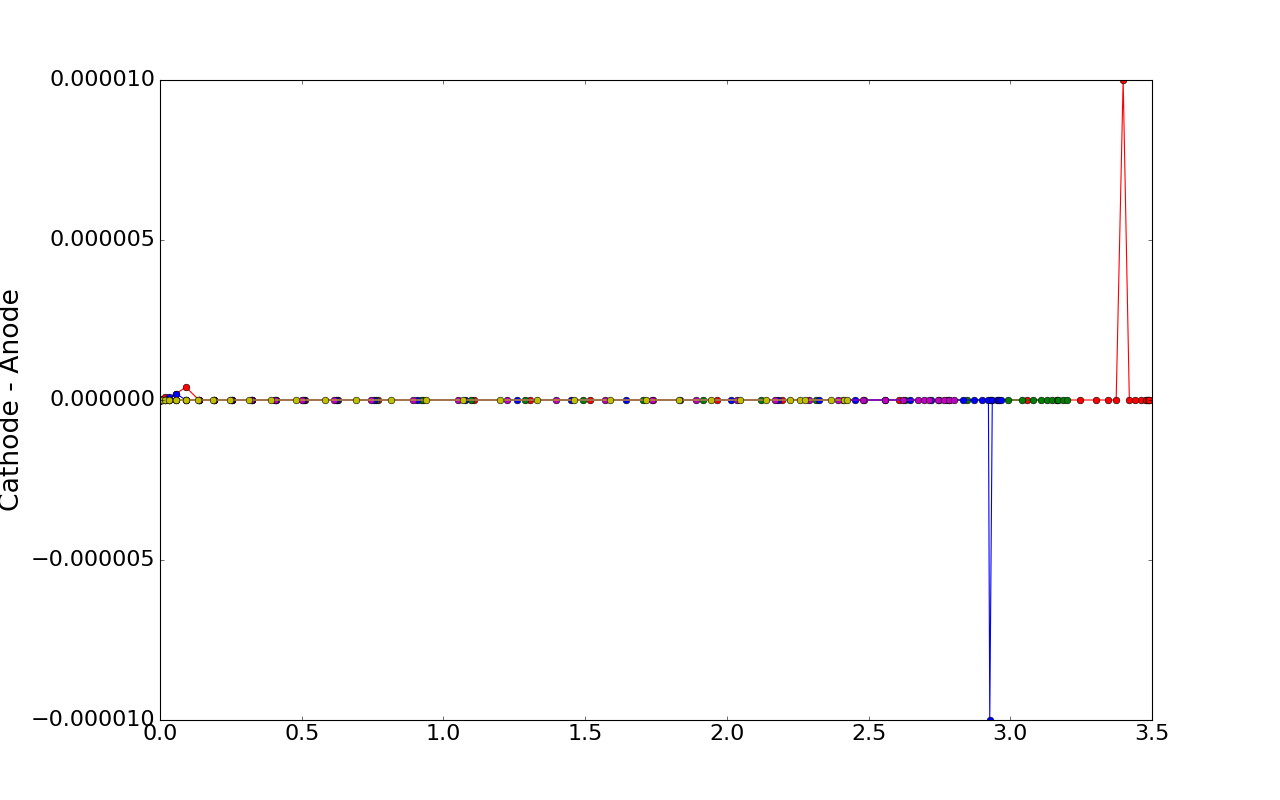

In [26]:
plt.figure(figsize=figsize)
style_cycler = cycle(color_cycle)
for key in sorted(dfs.keys()):
    sty=next(style_cycler)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],(df['Cathode current [A/cm2]']-df['anode_current']),'o-',**sty)
    #plt.yscale('symlog')
    plt.ylabel('Cathode - Anode')

<IPython.core.display.Javascript object>


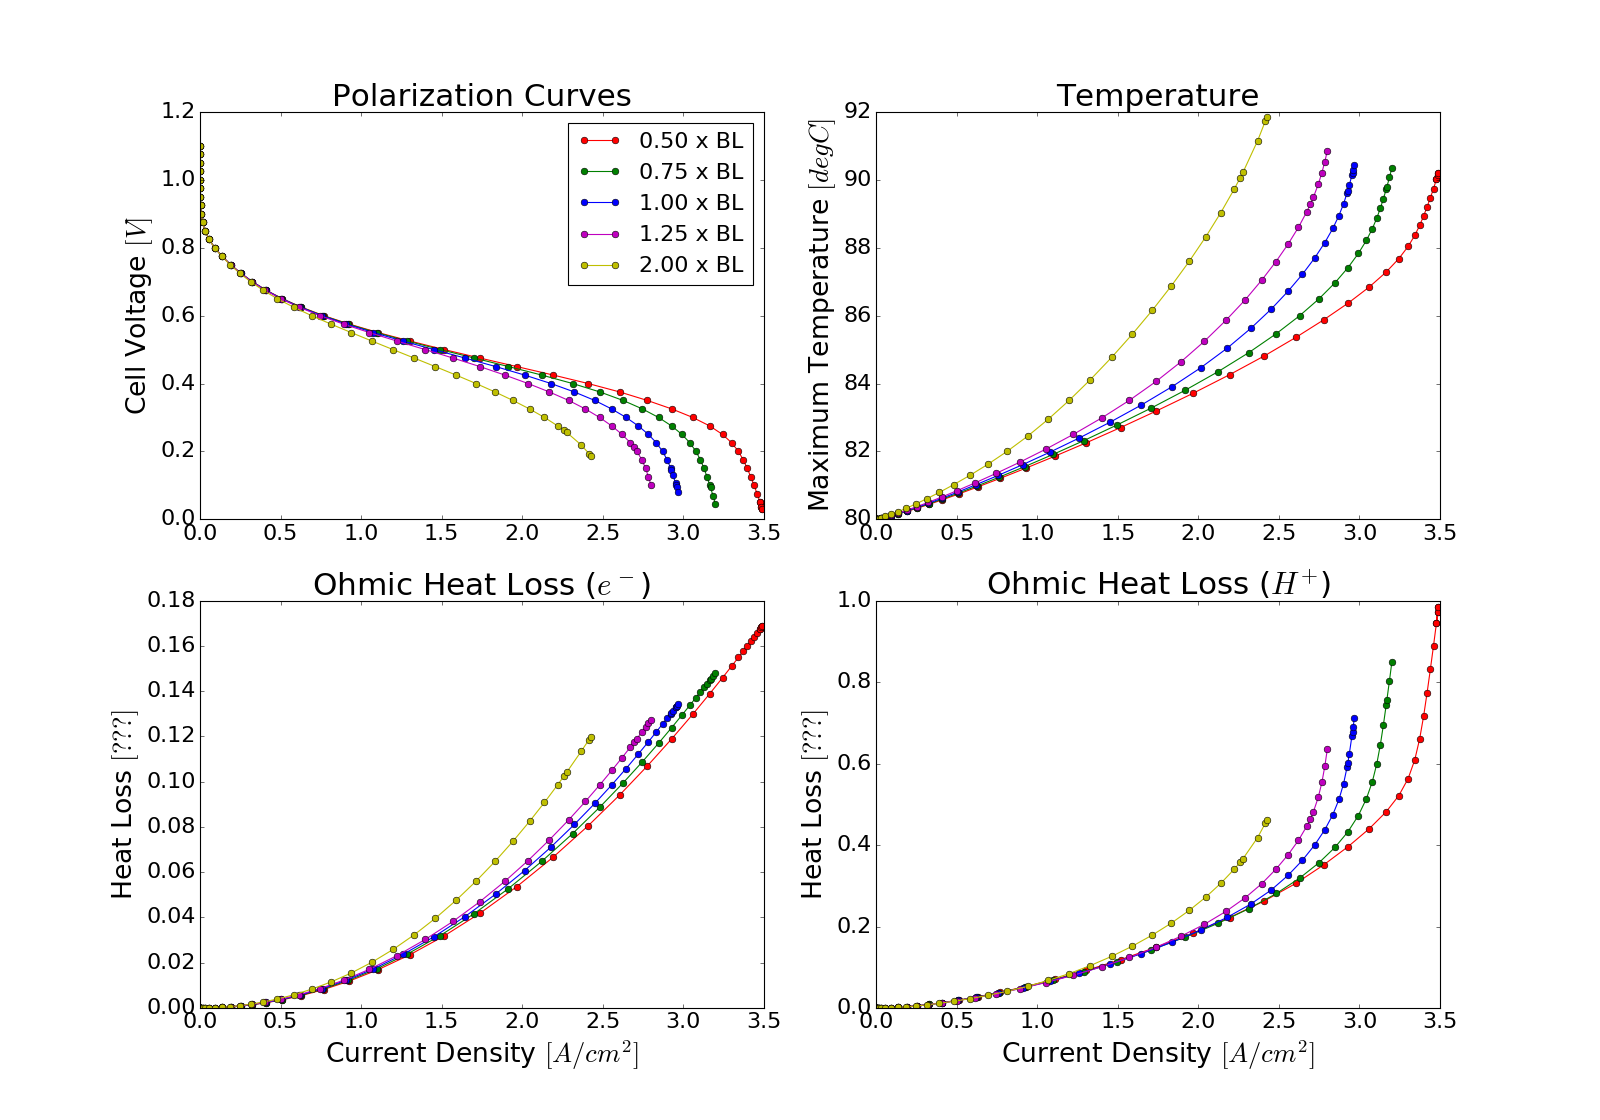

In [27]:
plt.figure(figsize=(20,14))
style_cycler = cycle(color_cycle)
for key in sorted(dfs.keys()):
    
    df  = dfs[key]
    sty = next(style_cycler)
    
    plt.subplot(2,2,1)
    plt.plot(df['Cathode current [A/cm2]'],df['Cell voltage [V]'],'o-',label=key,**sty)
    #plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Cell Voltage $[V]$')
    plt.title('Polarization Curves')
    plt.legend()
    
    plt.subplot(2,2,2)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],df['max_temperature']-273.15,'o-',label=key,**sty)
    #plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Maximum Temperature $[degC]$')
    plt.title('Temperature')
    #plt.legend()
    
    plt.subplot(2,2,3)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],df['electron_ohmic_heat'],'o-',label=key,**sty)
    plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Heat Loss $[???]$')
    plt.title('Ohmic Heat Loss ($e^-$)')
    #plt.legend()
    
    plt.subplot(2,2,4)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],df['proton_ohmic_heat'],'o-',label=key,**sty)
    plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Heat Loss $[???]$')
    plt.title('Ohmic Heat Loss ($H^{+}$)')
    #plt.legend()
    

    
    


<IPython.core.display.Javascript object>


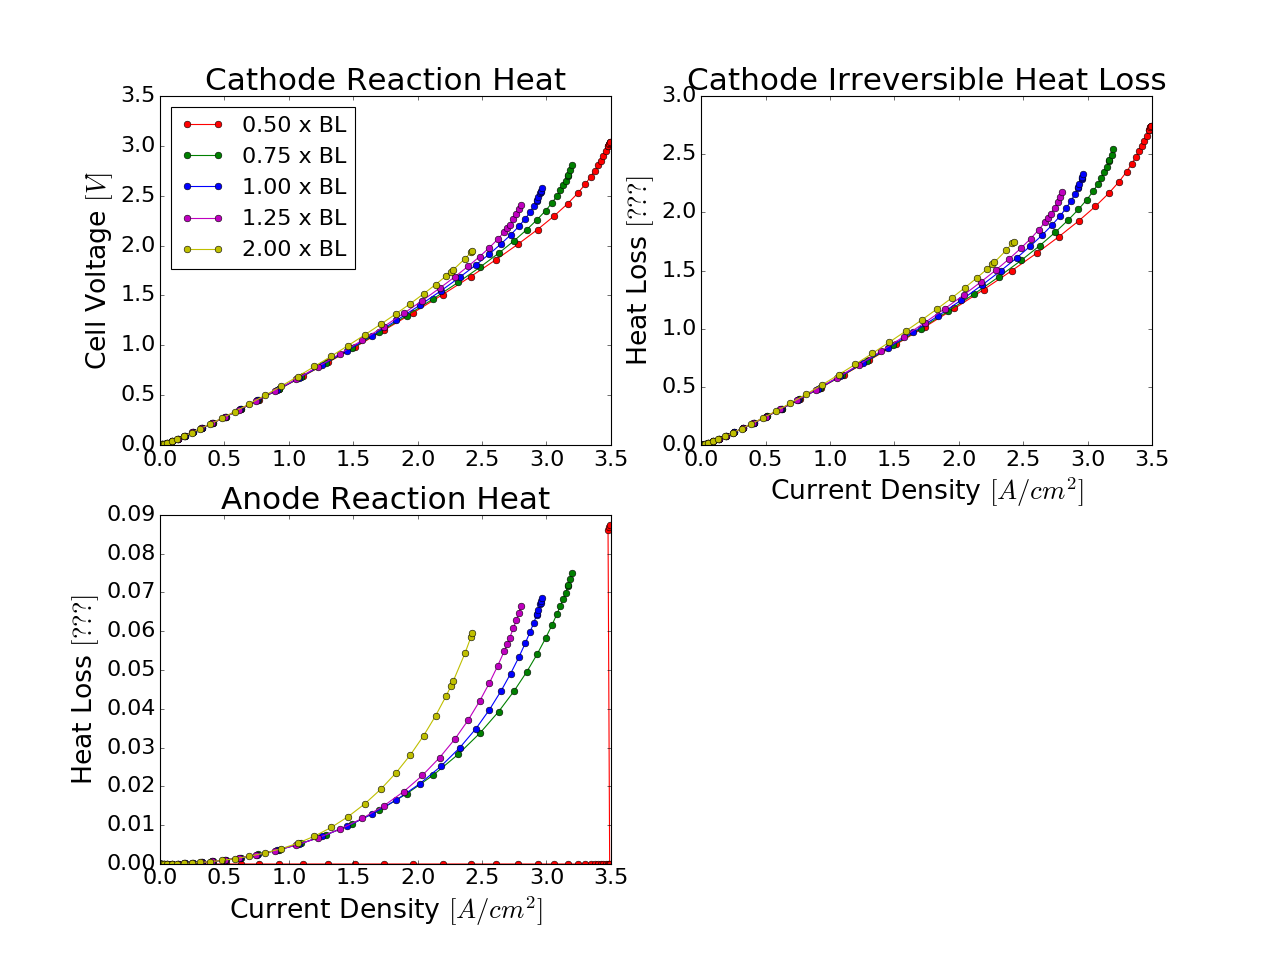

In [28]:
plt.figure(figsize=(16,12))
style_cycler = cycle(color_cycle)

for key in sorted(dfs.keys()):
    
    sty = next(style_cycler)
    df = dfs[key]
    
    plt.subplot(2,2,1)
    plt.plot(df['Cathode current [A/cm2]'],df['cathode_reaction_heat'],'o-',label=key,**sty)
    #plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Cell Voltage $[V]$')
    plt.title('Cathode Reaction Heat')
    plt.legend(loc=2)
    
    #plt.subplot(2,3,2)
    #df = dfs[key]
    #plt.plot(df['Cathode current [A/cm2]'],df['cathode_rev_heat']-273.15,'o-',label=key)
    #plt.xlabel('Current Density $[A/cm^2]$')
    #plt.ylabel('Maximum Temperature $[degC]$')
    #plt.title('Cathode Reversible Heat Loss')
    #plt.legend()
    
    plt.subplot(2,2,2)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],df['cathode_irrev_heat'],'o-',label=key,**sty)
    plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Heat Loss $[???]$')
    plt.title('Cathode Irreversible Heat Loss')
    #plt.legend()
    
    plt.subplot(2,2,3)
    df = dfs[key]
    plt.plot(df['Cathode current [A/cm2]'],df['anode_reaction_heat'],'o-',label=key,**sty)
    plt.xlabel('Current Density $[A/cm^2]$')
    plt.ylabel('Heat Loss $[???]$')
    plt.title('Anode Reaction Heat')
    #plt.legend()
    
    
    
    


# A simple 1D Fuel Cell Model

This simple model is based on the work by Kulikovsky \cite{Kulikovsky2014c}
\begin{equation}
V_\text{cell}(j) = V_\text{Nernst} - \eta_0(j) 
            - \eta_\text{trans,GCL}(j)
            - \eta_\text{trans,CCL}(j)
            - R_\Omega \ j
\end{equation}

where
* $V_\text{Nernst}$ denotes the Nernst potential

## Initialize the Kulikovsky Model

In [13]:
from pem_analytic import Kulikovsky, KulikovskyParameters, OperatingConditions, u
import lmfit

Initialize Operating Conditions


### Operating Conditions

In [14]:
print("Operating Conditions in SI\n")

OpsCon=OperatingConditions(rhCathode=0.7785, rhAnode=0.8652,
                          pCathode=2.49949*u.bar, pAnode=2.9156*u.bar,
                          T_Cool=(89.6466+273.15) * u.K)
OpsCon.print()

Operating Conditions in SI

Initialize Operating Conditions
Values stored in  <class 'pem_analytic.OperatingConditions'> :
O2 Concentration 	 =  17.35622440083001 mole / meter ** 3
rH Anode 	 =  0.8652
T Cool 	 =  362.7966 kelvin
Reference O2 Concentration 	 =  7.3599999999999985 mole / meter ** 3
rH Cathode 	 =  0.7785
P Anode 	 =  291560.0 kilogram / meter / second ** 2
O2 in air 	 =  0.20946
P Cathode 	 =  249949.00000000003 kilogram / meter / second ** 2




### Kulikovsky Parameter Set

In [15]:
print("Define Kulikovsky Parameter Set\n")

ModelParameters = KulikovskyParameters()
ModelParameters.print()

Define Kulikovsky Parameter Set

Values stored in  <class 'pem_analytic.KulikovskyParameters'> :
Exchange_Current 	 =  816.9999999999999 ampere / meter ** 3
Tafel_Slope 	 =  0.03 kilogram * meter ** 2 / ampere / second ** 3
PEM_Thickness 	 =  2.5e-05 meter
Ohmic_Resistance 	 =  8.000000000000001e-06 kilogram * meter ** 4 / ampere ** 2 / second ** 3
Area 	 =  0.004515 meter ** 2
GDL_Diffusivity 	 =  2.59e-06 meter ** 2 / second
CCL_Proton_Cond 	 =  3.0 ampere ** 2 * second ** 3 / kilogram / meter ** 3
CCL_Thickness 	 =  0.00025 meter
GDL_Thickness 	 =  0.00025 meter
CCL_Diffusivity 	 =  1.3600000000000003e-07 meter ** 2 / second




In [16]:
p_lmfit = ModelParameters.get_lmfit_params()


Creating LMFIT Object
Exchange_Current
Tafel_Slope
PEM_Thickness
Ohmic_Resistance
Area
GDL_Diffusivity
CCL_Proton_Cond
CCL_Thickness
GDL_Thickness
CCL_Diffusivity


In [17]:
p_lmfit['CCL_Proton_Cond'].set(min=1.0e-1,max=10,vary=True)
p_lmfit['Tafel_Slope'].set(min=1e-4,max=1e0,vary=True)
p_lmfit['Exchange_Current'].set(min=1e0,max=1e5,vary=True)
p_lmfit['Ohmic_Resistance'].set(min=0,max=2.0e-4,vary=True)
p_lmfit['GDL_Diffusivity'].set(min=1e-8, max=1.0e-1,vary=True)
p_lmfit['CCL_Diffusivity'].set(min=1e-9, max=1.0e-3,vary=True)

p_lmfit.pretty_print()

Name                 Value      Min      Max   Stderr     Vary     Expr
Area              0.004515     -inf      inf     None    False     None
CCL_Diffusivity   1.36e-07    1e-09    0.001     None     True     None
CCL_Proton_Cond          3      0.1       10     None     True     None
CCL_Thickness      0.00025     -inf      inf     None    False     None
Exchange_Current       817        1    1e+05     None     True     None
GDL_Diffusivity   2.59e-06    1e-08      0.1     None     True     None
GDL_Thickness      0.00025     -inf      inf     None    False     None
Ohmic_Resistance     8e-06        0   0.0002     None     True     None
PEM_Thickness      2.5e-05     -inf      inf     None    False     None
Tafel_Slope           0.03   0.0001        1     None     True     None


## Fitting Procedure

<IPython.core.display.Javascript object>


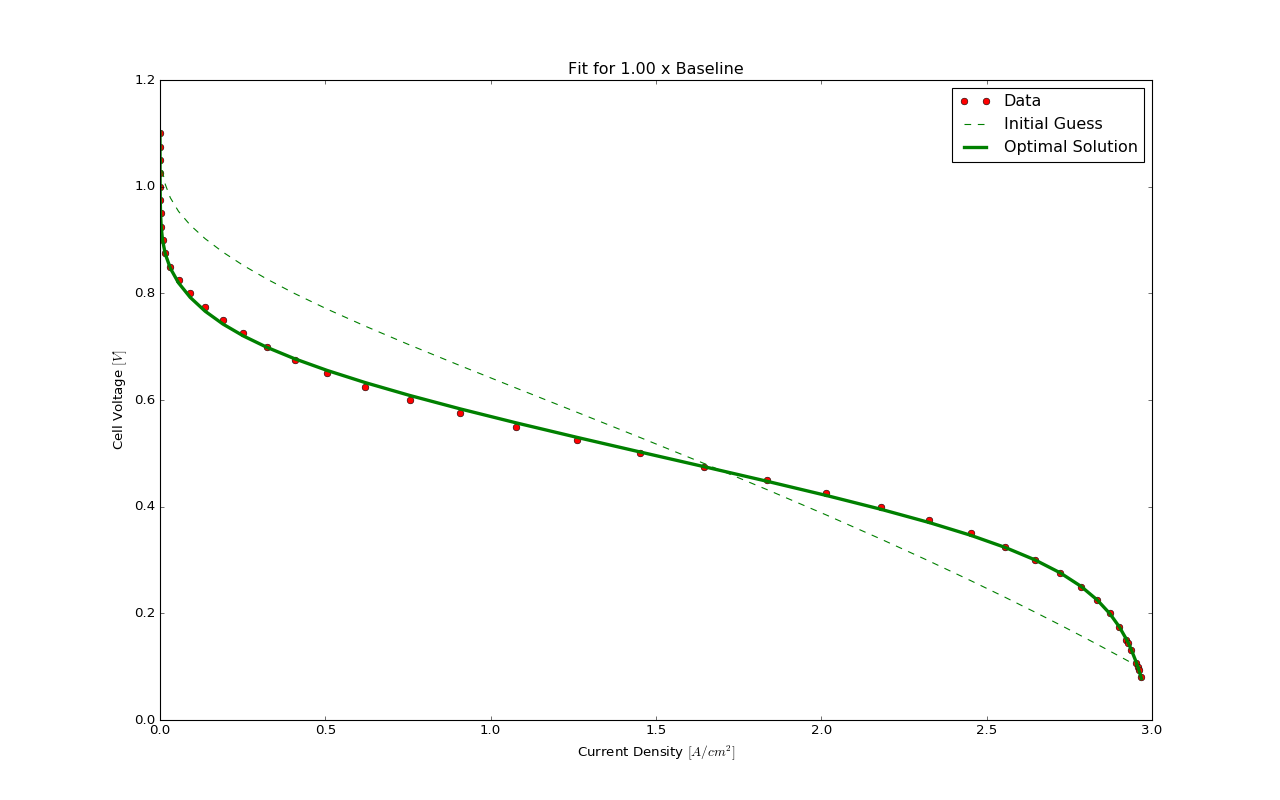

	- Prepare fitting data
	- Initialize Kulikovsky Model
Initializing Kulikovsky Model
-------------------------------------------------- 


--------------------------------------------------
	 Operating Conditions
--------------------------------------------------
Values stored in  <class 'pem_analytic.OperatingConditions'> :
rH Anode 	 =  0.8652
O2 in air 	 =  0.20946
T Cool 	 =  362.7966 kelvin
P Anode 	 =  291560.0 kilogram / meter / second ** 2
O2 Concentration 	 =  17.35622440083001 mole / meter ** 3
rH Cathode 	 =  0.7785
P Cathode 	 =  249949.00000000003 kilogram / meter / second ** 2
Reference O2 Concentration 	 =  7.3599999999999985 mole / meter ** 3


--------------------------------------------------
	 Kulikovsky Parameters
--------------------------------------------------
Values stored in  <class 'pem_analytic.KulikovskyParameters'> :
PEM_Thickness 	 =  2.5e-05 meter
GDL_Diffusivity 	 =  4.87105770607954e-07 meter ** 2 / second
GDL_Thickness 	 =  0.00025 meter
CCL_Proton_Co

In [52]:
key = '1.00 x Baseline'
plt.figure(figsize=figsize)

df = dfs[key]

print('\t- Prepare fitting data')
data={}
data['i'] = df['Cathode current [A/cm2]'].values * u.A/u.cm**2
data['V'] = df['Cell voltage [V]'].values * u.V
data["weights"] = sp.ones(data['i'].shape)
#data["weights"][-1:-5]=10
nd_i_range = sp.linspace(0,4,200)* u.A/u.cm**2

print('\t- Initialize Kulikovsky Model')
MyKulikovsky = Kulikovsky(OpsCon=OpsCon, Params=ModelParameters)
MyKulikovsky.set_lmfit_params(p_lmfit.copy())

print('\t - Calculate minimum GDL Diffusivity ') 
Dmin =  MyKulikovsky.calc_min_D_GDL(data['i'].max())
print ('\t\tMinimum D_GDL for Acceleration case is ', Dmin)
tmp = MyKulikovsky.get_lmfit_params()
tmp['GDL_Diffusivity'].set(value=1.0*Dmin.magnitude, min=0.05*Dmin.magnitude,vary=True)
tmp.pretty_print()
MyKulikovsky.set_lmfit_params(tmp.copy())

print('\t - Plot data and initial guess')
plt.plot(data['i'],data['V'],'ro',label='Data')
plt.plot(data['i'],MyKulikovsky.V_cell(data['i']),'g--',label='Initial Guess')


print('\t - Execute Fit')

params_0 = MyKulikovsky.get_lmfit_params().copy()
params = params_0.copy()

minimizer = lmfit.minimize(MyKulikovsky.residual, params, args = (data['i'], data['V'],'default',data['weights']) )
MyKulikovsky.set_lmfit_params(minimizer.params)
print('\t\tMinimizer Succefull: ', minimizer.success)
print('\t\tResidual:            ', minimizer.residual)
print(minimizer.covar)
minimizer.params.pretty_print()
plt.plot(data['i'],MyKulikovsky.V_cell(data['i']),'g-',linewidth=3,label='Optimal Solution')

plt.legend()
plt.xlabel('Current Density $[A/cm^2]$')
plt.ylabel('Cell Voltage $[V]$')
plt.title('Fit for ' + key)


<IPython.core.display.Javascript object>


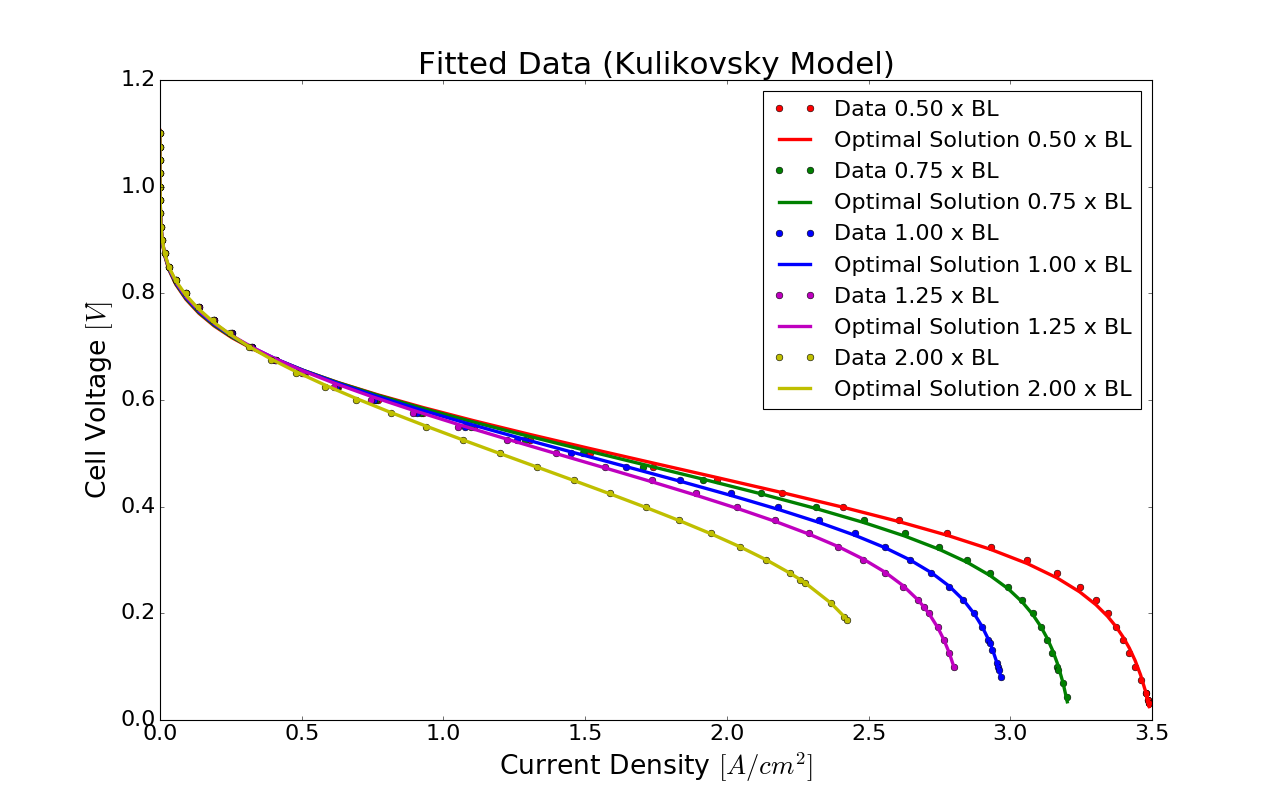

	- Prepare fitting data
	- Initialize Kulikovsky Model
Initializing Kulikovsky Model
-------------------------------------------------- 


--------------------------------------------------
	 Operating Conditions
--------------------------------------------------
Values stored in  <class 'pem_analytic.OperatingConditions'> :
O2 Concentration 	 =  17.35622440083001 mole / meter ** 3
rH Anode 	 =  0.8652
T Cool 	 =  362.7966 kelvin
Reference O2 Concentration 	 =  7.3599999999999985 mole / meter ** 3
rH Cathode 	 =  0.7785
P Anode 	 =  291560.0 kilogram / meter / second ** 2
O2 in air 	 =  0.20946
P Cathode 	 =  249949.00000000003 kilogram / meter / second ** 2


--------------------------------------------------
	 Kulikovsky Parameters
--------------------------------------------------
Values stored in  <class 'pem_analytic.KulikovskyParameters'> :
Exchange_Current 	 =  12.314032591974701 ampere / meter ** 3
Tafel_Slope 	 =  0.03020429023954546 kilogram * meter ** 2 / ampere / second ** 

In [29]:
plt.figure(figsize=figsize)
style_cycler = cycle(color_cycle)
df_params = pd.DataFrame(sp.zeros((len(dfs),len(p_lmfit.keys()))),index=sorted(dfs.keys()),columns=p_lmfit.keys())

for key in sorted(dfs.keys()):
    df = dfs[key]
    sty = next(style_cycler)
    
    print('\t- Prepare fitting data')
    data={}
    data['i'] = df['Cathode current [A/cm2]'].values * u.A/u.cm**2
    data['V'] = df['Cell voltage [V]'].values * u.V
    data["weights"] = sp.ones(data['i'].shape)
    #data["weights"][-1:-5]=10
    nd_i_range = sp.linspace(0,4,200)* u.A/u.cm**2

    print('\t- Initialize Kulikovsky Model')
    MyKulikovsky = Kulikovsky(OpsCon=OpsCon, Params=ModelParameters)
    MyKulikovsky.set_lmfit_params(p_lmfit.copy())

    print('\t - Calculate minimum GDL Diffusivity ') 
    Dmin =  MyKulikovsky.calc_min_D_GDL(data['i'].max())
    print ('\t\tMinimum D_GDL for Acceleration case is ', Dmin)
    tmp = MyKulikovsky.get_lmfit_params()
    tmp['GDL_Diffusivity'].set(value=1.0*Dmin.magnitude, min=0.05*Dmin.magnitude,vary=True)
    tmp.pretty_print()
    MyKulikovsky.set_lmfit_params(tmp.copy())

    print('\t - Plot data and initial guess')
    plt.plot(data['i'],data['V'],'o',label='Data ' + key ,**sty)
    #plt.plot(data['i'],MyKulikovsky.V_cell(data['i']),'g--',label='Initial Guess')


    print('\t - Execute Fit')

    params_0 = MyKulikovsky.get_lmfit_params().copy()
    params = params_0.copy()

    minimizer = lmfit.minimize(MyKulikovsky.residual, params, args = (data['i'], data['V'],'default',data['weights']) )
    MyKulikovsky.set_lmfit_params(minimizer.params)
    print('\t\tMinimizer Succefull: ', minimizer.success)
    print('\t\tResidual:            ', minimizer.residual)
    print(minimizer.covar)
    minimizer.params.pretty_print()
    plt.plot(data['i'],MyKulikovsky.V_cell(data['i']),'-',linewidth=3,label='Optimal Solution ' + key,**sty)
    
    for paramkey in minimizer.params.keys():
        df_params.loc[key][paramkey] = params[paramkey].value

plt.legend()
plt.xlabel('Current Density $[A/cm^2]$')
plt.ylabel('Cell Voltage $[V]$')
plt.title('Fitted Data (Kulikovsky Model)')

In [30]:
df_params

Exchange_Current  Tafel_Slope  PEM_Thickness  Ohmic_Resistance  \
0.50 x BL             817.0         0.03       0.000025          0.000008   
0.75 x BL             817.0         0.03       0.000025          0.000008   
1.00 x BL             817.0         0.03       0.000025          0.000008   
1.25 x BL             817.0         0.03       0.000025          0.000008   
2.00 x BL             817.0         0.03       0.000025          0.000008   

               Area  GDL_Diffusivity  CCL_Proton_Cond  CCL_Thickness  \
0.50 x BL  0.004515     1.302653e-06              3.0        0.00025   
0.75 x BL  0.004515     1.194696e-06              3.0        0.00025   
1.00 x BL  0.004515     1.107668e-06              3.0        0.00025   
1.25 x BL  0.004515     1.045166e-06              3.0        0.00025   
2.00 x BL  0.004515     9.051003e-07              3.0        0.00025   

           GDL_Thickness  CCL_Diffusivity  
0.50 x BL        0.00025     1.360000e-07  
0.75 x BL        0.00025     1.360000e-07  
1.00 x BL        0.00025     1.360000e-07  
1.25 x BL        0.00025     1.360000e-07  
2.00 x BL        0.00025     1.360000e-07

<IPython.core.display.Javascript object>


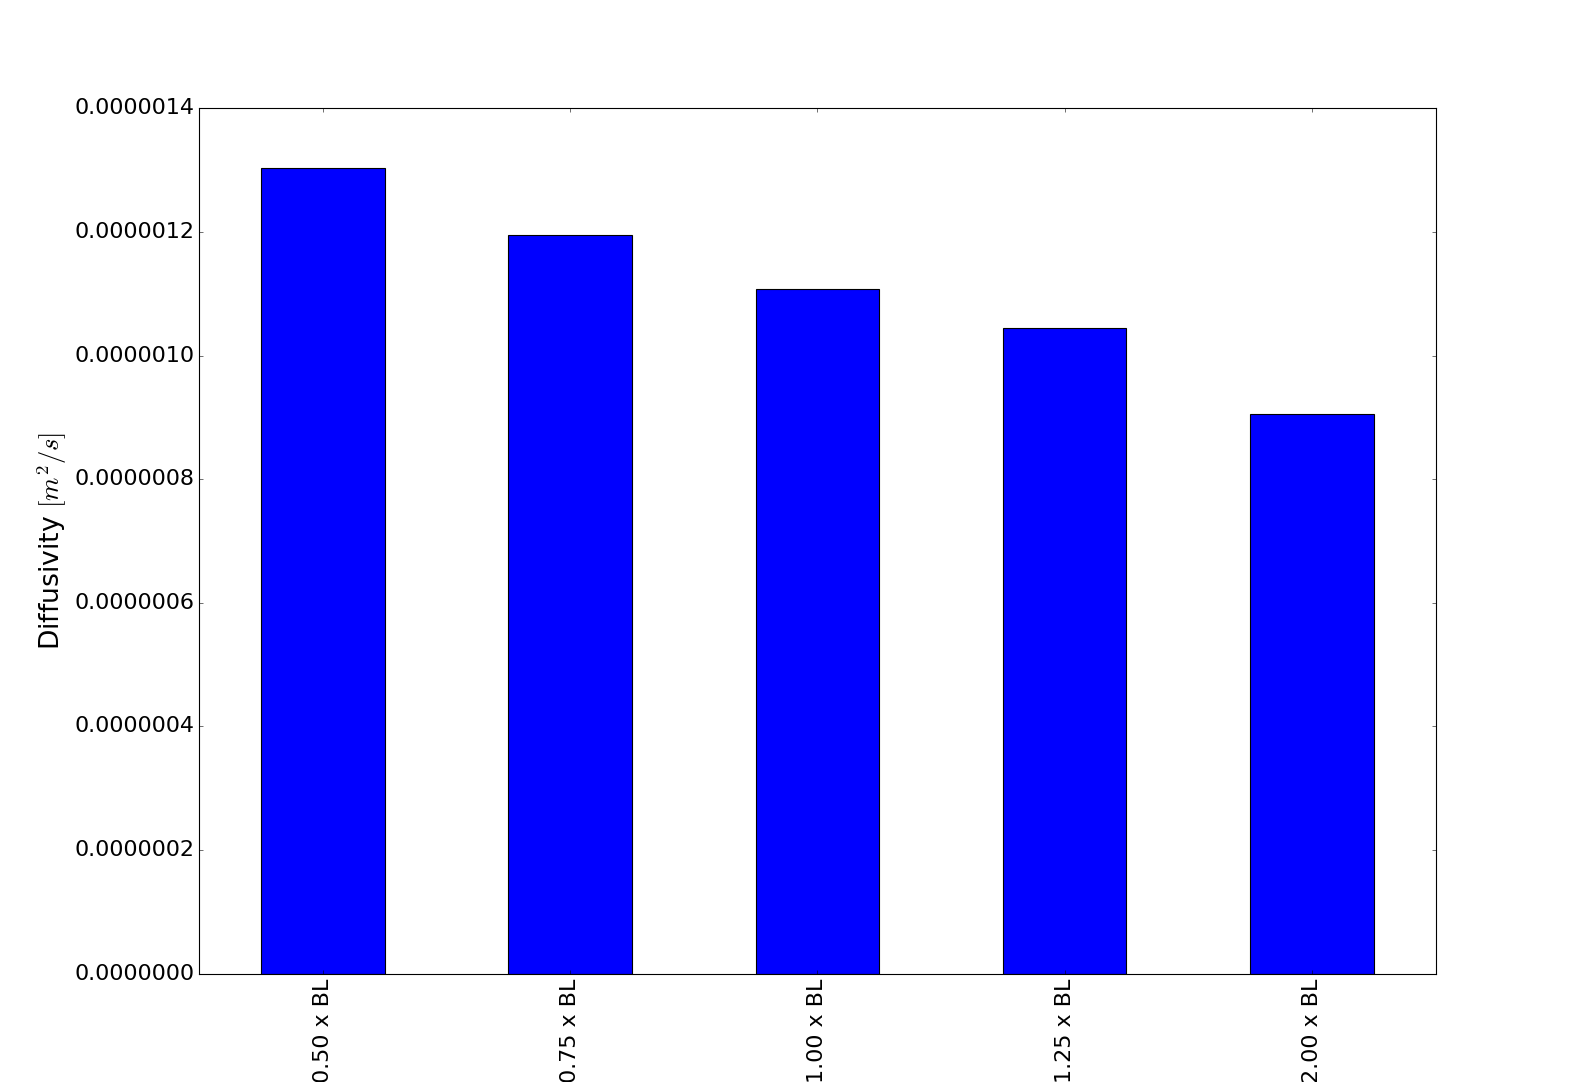

In [31]:
plt.figure(figsize=(20,12))
df_params['GDL_Diffusivity'].plot.bar()
plt.gca()
plt.ylabel('Diffusivity $[m^2/s]$')

# References

(<a id="cit-Kulikovsky2014c" href="#call-Kulikovsky2014c">Kulikovsky, 2014</a>) Kulikovsky Andrei A., ``_A simple equation for in situ measurement of the catalyst layer oxygen diffusivity in PEM fuel cell_'', Journal of Electroanalytical Chemistry, vol. 720-721, number , pp. 47--51, apr 2014.  [online](http://linkinghub.elsevier.com/retrieve/pii/S1572665714000988)

